In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("model\\BAD.csv")

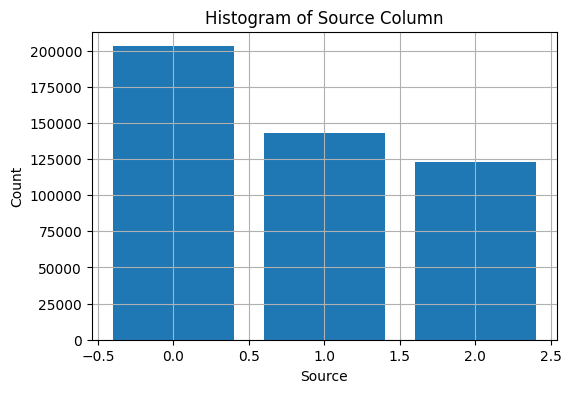

In [ ]:
plt.figure(figsize=(6,4))
df['source'].hist(bins=range(4),  align='left', rwidth=0.8)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Histogram of Source Column')
# plt.xticks(range(4))
plt.show()

"""
0 => preview
1 => vid screen
2 => img
"""

Source 0:
 Rows: 202925
 Width min=90, max=400
 Height min=56, max=670
 Top (width, height) pairs:
 width  height  count
   200     200 124059
   200     112  41371
   200     354  19626
   200     266   3618
   200     150   2454
   200     356   1017
   112     200    984
   200     132    893
   200     352    638
   200     110    567


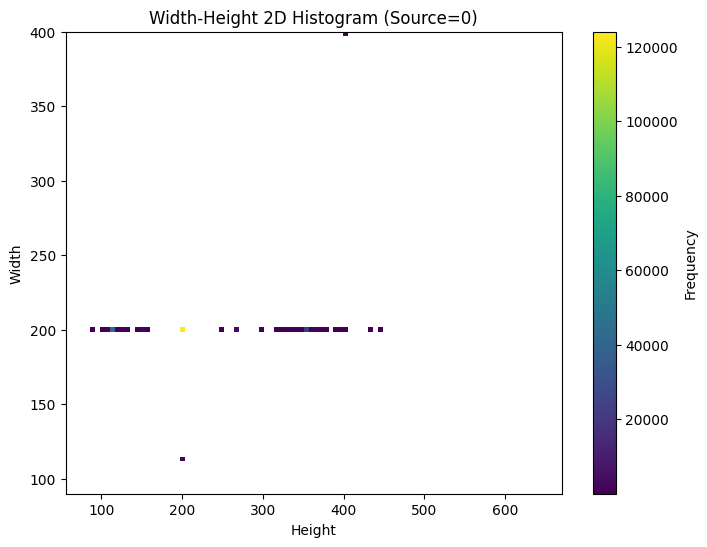

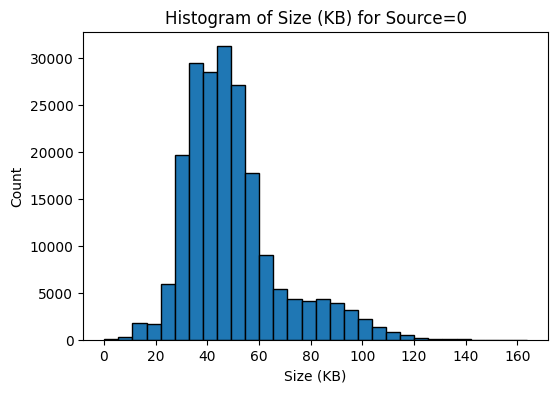

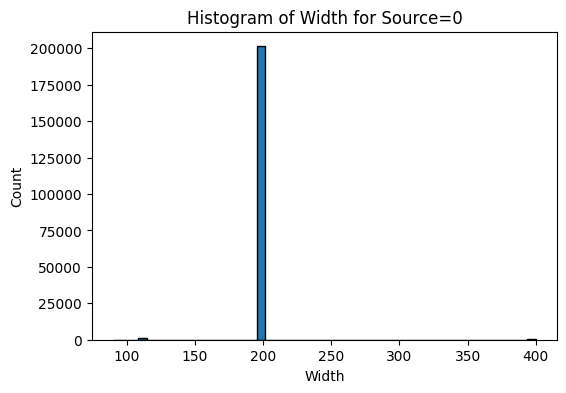

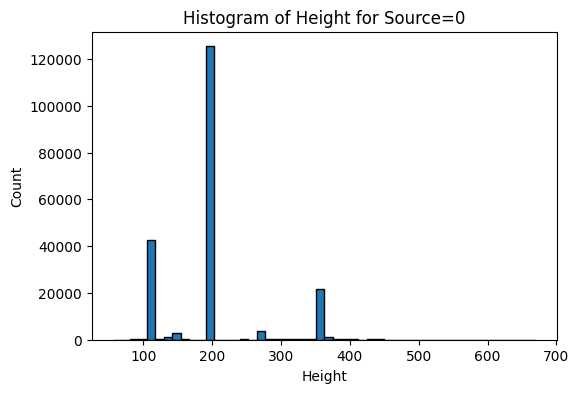

Source 1:
 Rows: 142792
 Width min=68, max=400
 Height min=113, max=400
 Top (width, height) pairs:
 width  height  count
   400     225  72236
   127     225  40110
   169     225   7208
   400     300   3624
   400     226   1460
   128     225   1332
   400     267   1218
   400     400   1154
   124     225   1104
   120     225    816


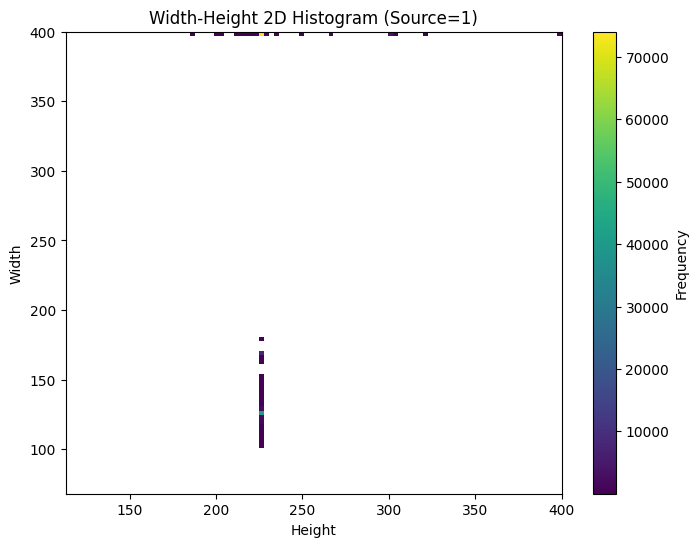

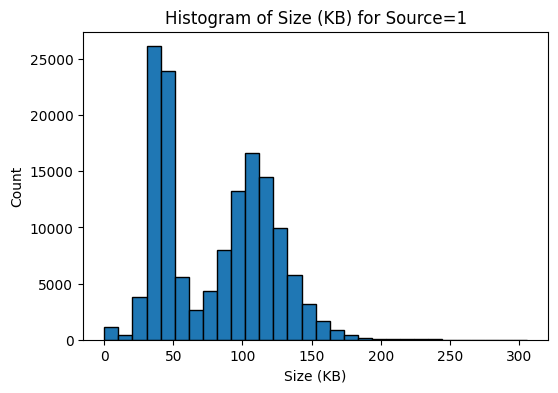

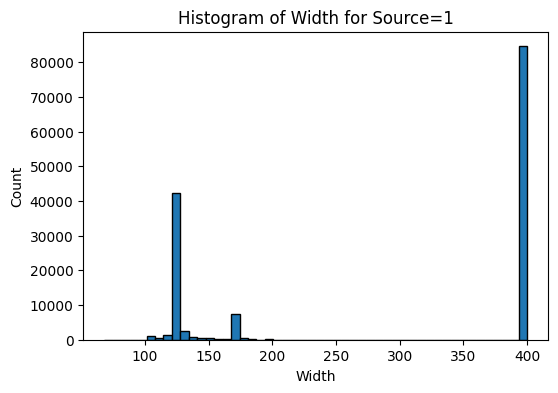

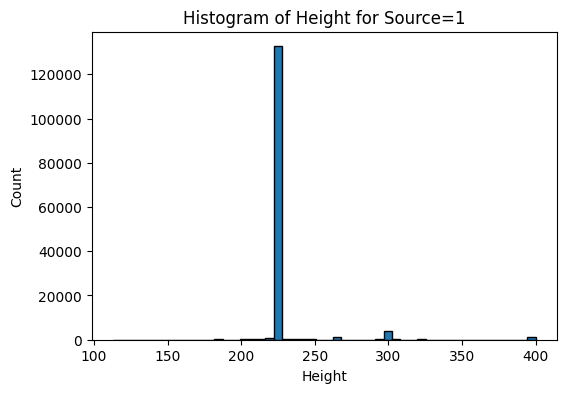

Source 2:
 Rows: 122782
 Width min=60, max=7086
 Height min=69, max=6978
 Top (width, height) pairs:
 width  height  count
  1440    1920   7953
  1280    1920   6174
   480     640   2990
  3024    4032   2849
  2316    3088   2608
  1920    1280   2442
  1200    1200   2348
  1000     666   2060
   666    1000   2039
  1080    1920   1842


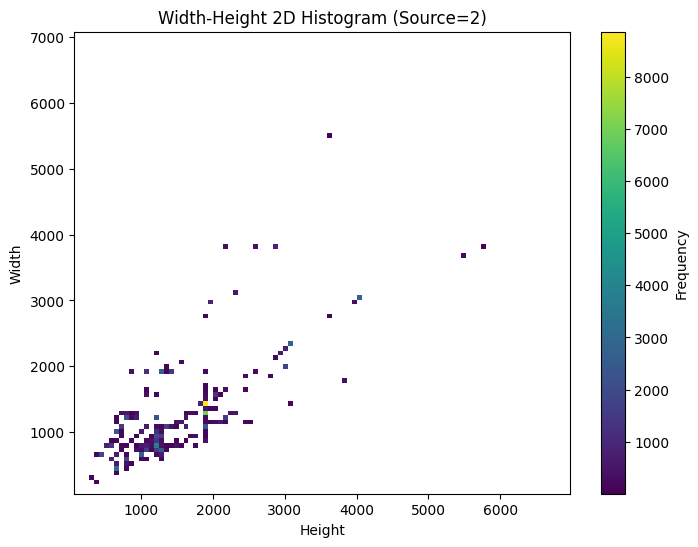

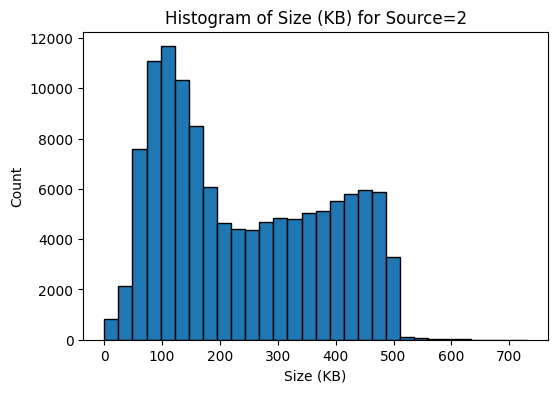

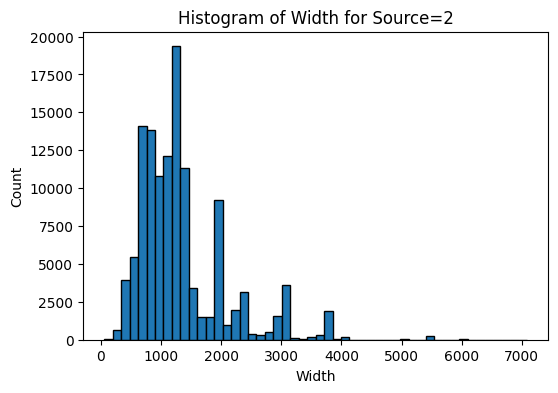

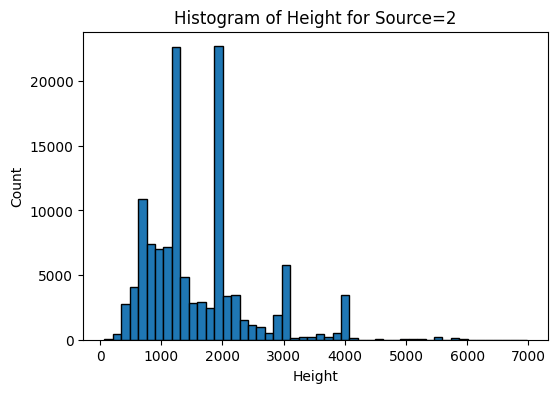

In [34]:


for src in sorted(df['source'].unique()):
    subset = df[df['source'] == src]
    # Debug info
    print(f"Source {src}:")
    print(f" Rows: {len(subset)}")
    print(f" Width min={subset['width'].min()}, max={subset['width'].max()}")
    print(f" Height min={subset['height'].min()}, max={subset['height'].max()}")
    # Most frequent (width, height) pairs
    freq_pairs = subset.groupby(['width','height']).size().reset_index(name='count')
    freq_pairs = freq_pairs.sort_values(by='count', ascending=False)
    print(" Top (width, height) pairs:")
    print(freq_pairs.head(10).to_string(index=False))


    # Custom colormap with white for 0
    cmap = plt.cm.viridis.copy()
    cmap.set_under('white')
    # 2D Histogram of (width, height)
    plt.figure(figsize=(8,6))
    plt.hist2d(subset['height'], subset['width'], bins=100, cmap=cmap, cmin = 100,  vmin = 0.001)
    plt.colorbar(label='Frequency')
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title(f'Width-Height 2D Histogram (Source={src})')
    plt.show()


    # Histogram of size_kb
    plt.figure(figsize=(6,4))
    plt.hist(subset['size_kb'], bins=30, edgecolor='black')
    plt.xlabel('Size (KB)')
    plt.ylabel('Count')
    plt.title(f'Histogram of Size (KB) for Source={src}')
    plt.show()

    # Histogram of width
    plt.figure(figsize=(6,4))
    plt.hist(subset['width'], bins=50, edgecolor='black')
    plt.xlabel('Width')
    plt.ylabel('Count')
    plt.title(f'Histogram of Width for Source={src}')
    plt.show()


    # Histogram of height
    plt.figure(figsize=(6,4))
    plt.hist(subset['height'], bins=50, edgecolor='black')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.title(f'Histogram of Height for Source={src}')
    plt.show()

for src=0 => bunkr preview
width is overwhelmingly = 200
basically just scale everything to 200 width i guess?


for src=1 => vid screen
height=225 is one mode
width=400 is another mode
is this a vertical/horizontal split?
interestingly my good dataset really doesn't have any verts
no that's not true..?
SEEMS LIKE HEIGHT=225 IS THE RULE HERE


when I'm creating GOOD, i should:
do 1 "preview" equivalent where I scale width to 200, no questions asked
if vid, take 20% in

if vid: take a screenshot at 40% and 80%
rescale height to 225
also take a screenshot at full size? 90% in? 

if pic: standard cmpr

grab 5 per album -> actual number is 10
grab 5 random previews
grab 5 random files

roughly 100000 albums
